In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline


plt.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd

In [5]:
csData = pd.read_csv("../exampleCode/dataset/customerdata.csv")
csData.head(10)

,CUSTID,AVGPRICE,EMI,DEVICECOUNT,PRODUCTAGE,CUSTTYPE
0,A13566,4273.900000,3,6,1.679181,Big-Screen-lover
1,A14219,3642.441950,2,4,2.682023,Sleeping-dog
2,A15312,3653.884565,2,5,3.208202,Sleeping-dog
3,A16605,3713.211107,2,6,0.900000,Early-bird
4,B10634,3391.074215,2,4,2.453656,Sleeping-dog
5,B16849,3755.263391,2,4,2.786665,Sleeping-dog
6,B18816,3213.911446,2,6,0.900000,Early-bird
7,C10639,3516.500000,2,5,2.564830,Big-Screen-lover
8,C12717,3732.900000,2,5,2.069995,Big-Screen-lover
9,C15050,4020.173425,2,4,3.013440,Sleeping-dog


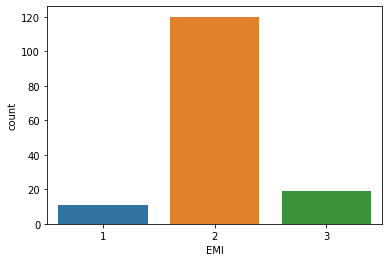

In [9]:
sns.countplot(data = csData, x="EMI")    # EMI : 무이자 할부 건수

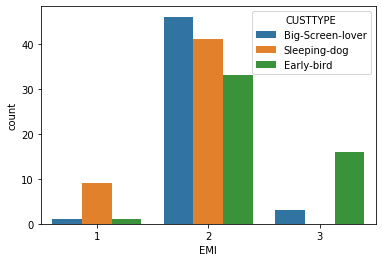

In [8]:
sns.countplot(data = csData, x="EMI", hue = "CUSTTYPE")    # hue 옵션을 통해 타입별로 빈도수 확인 가능.

히스토그램

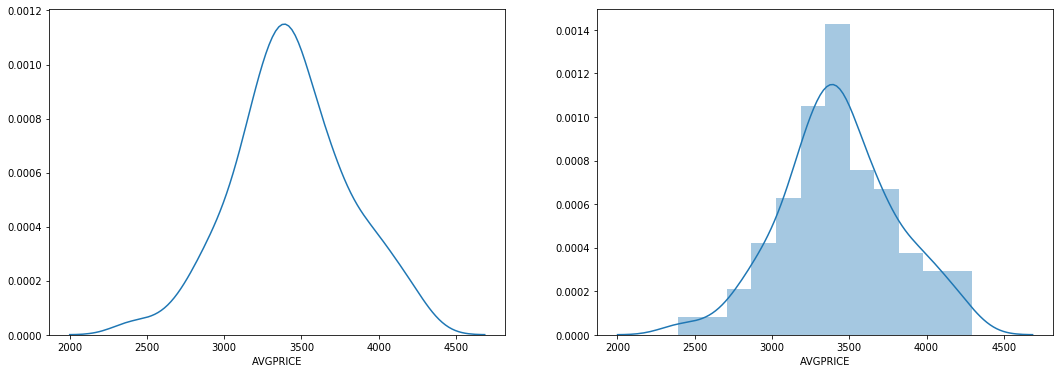

In [20]:
figure = plt.figure(figsize=(18,6))

ax1 = plt.subplot(1,2,1)
sns.distplot(csData.AVGPRICE, kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(csData.AVGPRICE, ax=ax2)    # 기본값은 kde(선) True, hist(막대) True

바 차트

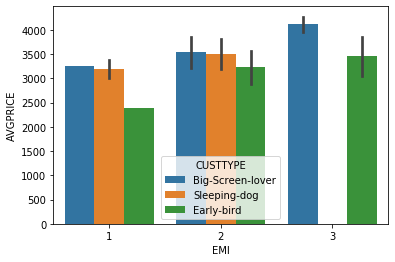

In [25]:
sns.barplot(x = 'EMI', y = 'AVGPRICE', data = csData, hue = 'CUSTTYPE', ci = 'sd')

In [33]:
sns.countplot(x = 'EMI', y = 'AVGPRICE', data = csData, hue = "CUSTTYPE")    # countplot과 barplot이 비슷해 보이지만
# count는 x축에 y축이 아니라 선택한 x축의 값을 count하는 것이라 x축과 y축에 데이터를 넣고 상관관계를 알려면 barplot을 써야한다.

TypeError: Cannot pass values for both `x` and `y`

박스 차트

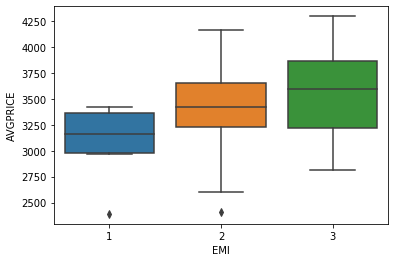

In [39]:
sns.boxplot(data = csData, x = 'EMI', y = 'AVGPRICE')

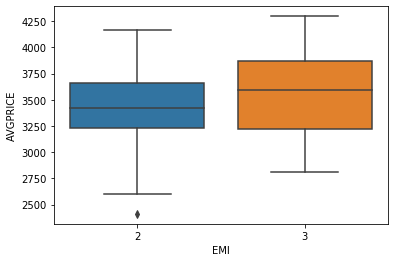

In [37]:
sns.boxplot(data = csData[csData.EMI != 1], x = 'EMI', y = 'AVGPRICE')    # EMI가 1인 것은 제외하고 보겠다.

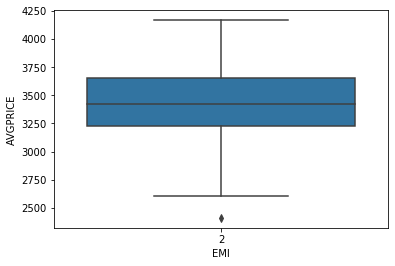

In [42]:
sns.boxplot(data = csData[csData.EMI == 2], x = 'EMI', y = 'AVGPRICE')

In [43]:
# 하단의 선(약 2600) ~ 박스 하단(약 3250) 하위 25%
# 박스 상단(약 3700) ~ 상단의 선(약 4200) 상위 25%
# 박스 = 50%... 박스에도 중간에 선을 기준으로 25%, 25%

In [48]:
testSet = csData[csData.EMI == 2]

In [49]:
testSet.AVGPRICE.describe()

count     120.000000
mean     3441.429664
std       349.691674
min      2411.008838
25%      3231.429242
50%      3418.480121
75%      3656.799297
max      4166.533130
Name: AVGPRICE, dtype: float64

In [50]:
csData[csData.EMI == 2].AVGPRICE.describe()

count     120.000000
mean     3441.429664
std       349.691674
min      2411.008838
25%      3231.429242
50%      3418.480121
75%      3656.799297
max      4166.533130
Name: AVGPRICE, dtype: float64

lineplot

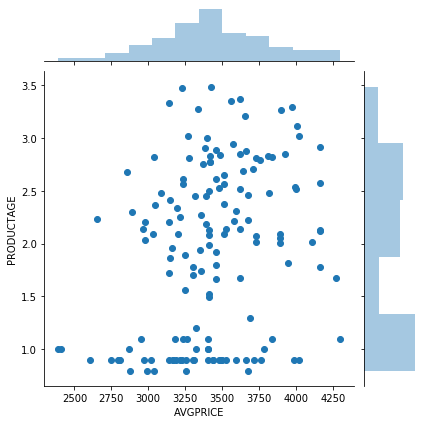

In [58]:
sns.jointplot(data = csData, x = 'AVGPRICE', y = 'PRODUCTAGE')

In [6]:
import pandas as pd
featuresData = pd.read_csv('../exampleCode/dataset/feature_regression_example.csv')
print(featuresData.shape)

(107, 12)


In [52]:
featuresData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155
...,...,...,...,...,...,...,...,...,...,...,...,...
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800,N,4,Y,0.352361
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173,N,4,Y,0.352361
104,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201652,2016,52,332,Y,1,Y,0.352361
105,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201710,2017,10,14,N,4,N,0.000000


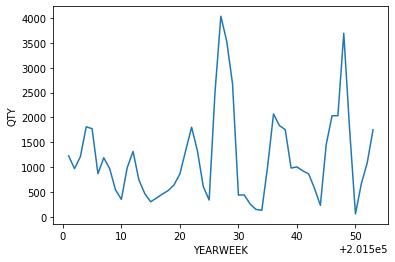

In [53]:
sns.lineplot(data = featuresData[featuresData.YEAR == 2015], x = 'YEARWEEK', y = 'QTY')

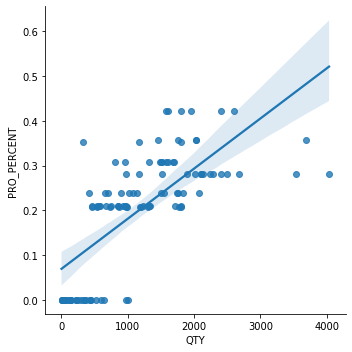

In [54]:
sns.lmplot(data = featuresData, x = 'QTY', y = 'PRO_PERCENT')    # 할인율이 오르면 판매량이 늘어나는구나.

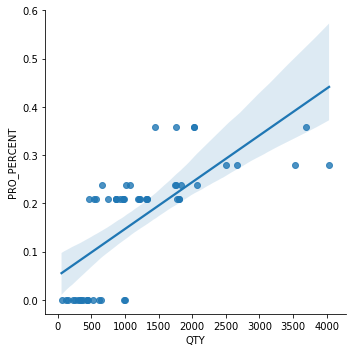

In [55]:
sns.lmplot(data = featuresData[featuresData.YEAR == 2015], x = 'QTY', y = 'PRO_PERCENT')

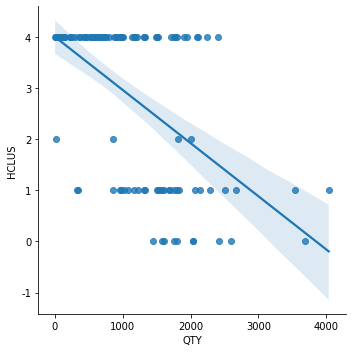

In [56]:
sns.lmplot(data = featuresData, x = 'QTY', y = 'HCLUS')    # 홀리데이(HCLUS)가 길면 판매가 줄어드는구나. 홀레데이가 짧으면 판매가 늘어나는구나.

jointplot

In [60]:
featuresData.corr()   # 상관 분석

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT
YEARWEEK,1.000000,0.961051,0.213022,0.037392,-0.030681,0.300320
YEAR,0.961051,1.000000,-0.065302,-0.048803,0.067443,0.208435
WEEK,0.213022,-0.065302,1.000000,0.307541,-0.349205,0.347462
QTY,0.037392,-0.048803,0.307541,1.000000,-0.544920,0.712772
HCLUS,-0.030681,0.067443,-0.349205,-0.544920,1.000000,-0.552991
PRO_PERCENT,0.300320,0.208435,0.347462,0.712772,-0.552991,1.000000


In [61]:
featuresCorr = featuresData.corr()

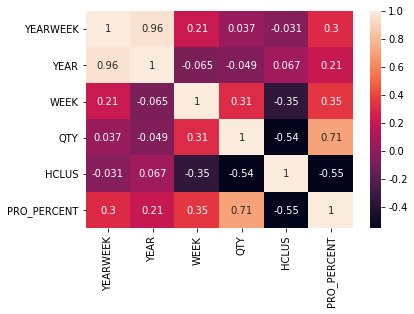

In [62]:
sns.heatmap(featuresCorr, annot = True)

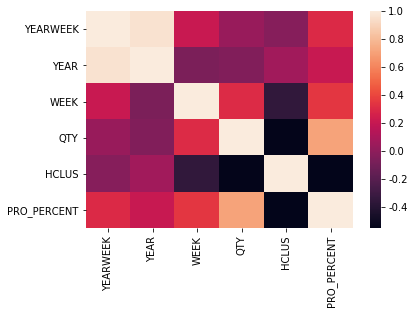

In [63]:
sns.heatmap(featuresCorr, annot = False)

In [ ]:
빈도수, 박스, lm plot

### https://github.com/mwaskom/seaborn-data 내 tips, flights 데이터를 활용하여 시각화 하세요.

In [64]:
import pandas as pd
import seaborn as sns

### tips 분석

In [103]:
tipsRawUrl = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'
tipsData = pd.read_csv(tipsRawUrl)
tipsData

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


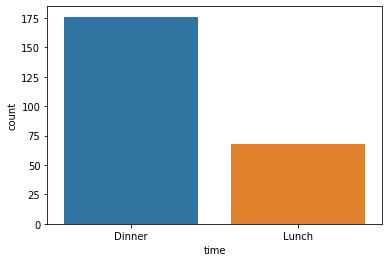

In [104]:
sns.countplot(data = tipsData, x = 'time')

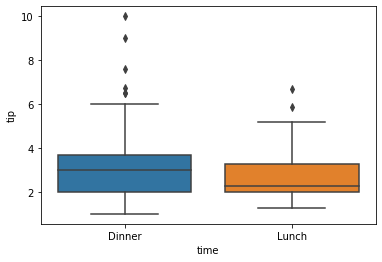

In [76]:
sns.boxplot(data = tipsData, x = 'time', y = 'tip')

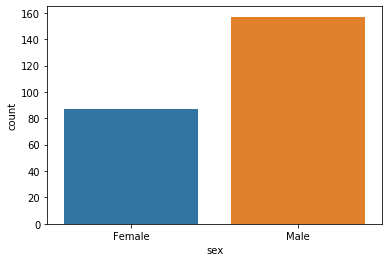

In [72]:
sns.countplot(data = tipsData, x = 'sex')

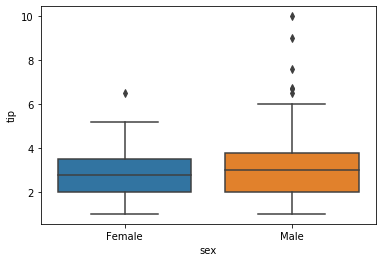

In [77]:
sns.boxplot(data = tipsData, x = 'sex', y = 'tip')

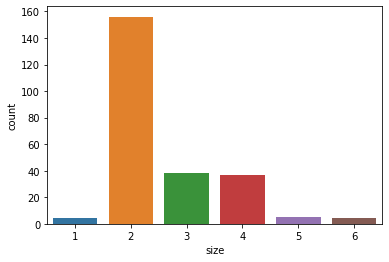

In [73]:
sns.countplot(data = tipsData, x = 'size')

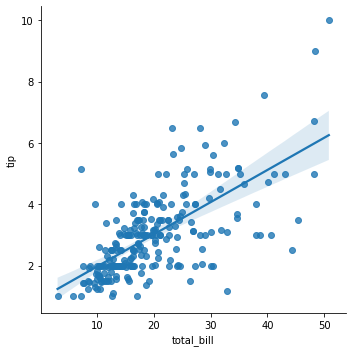

In [78]:
sns.lmplot(data = tipsData, x = 'total_bill', y = 'tip')

In [1]:
figure = plt.figure(figsize=(18,6))

ax1 = plt.subplot(1,2,1)
sns.distplot(tipsData.time, kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(tipsData.sex, ax=ax2)    # 기본값은 kde(선) True, hist(막대) True

NameError: name 'plt' is not defined

### flights 분석

In [90]:
flightsRawUrl = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv'
flightsData = pd.read_csv(flightsRawUrl)
flightsData

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


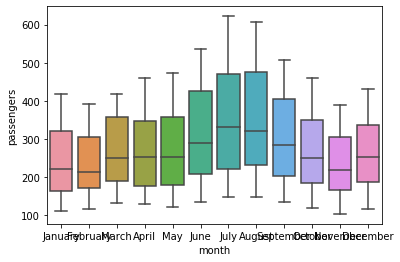

In [96]:
sns.boxplot(data = flightsData, x = 'month', y = 'passengers')

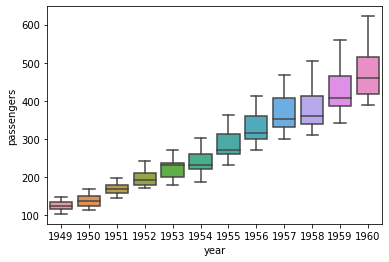

In [97]:
sns.boxplot(data = flightsData, x = 'year', y = 'passengers')

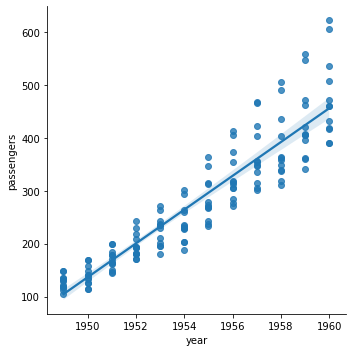

In [99]:
sns.lmplot(data = flightsData, x = 'year', y = 'passengers')

In [3]:
csData = pd.read_csv('../exampleCode/dataset/customerdata.csv')

In [7]:
csData.corr()

,AVGPRICE,EMI,DEVICECOUNT,PRODUCTAGE
AVGPRICE,1.000000,0.237539,0.069160,0.282558
EMI,0.237539,1.000000,0.487092,-0.348045
DEVICECOUNT,0.069160,0.487092,1.000000,-0.700726
PRODUCTAGE,0.282558,-0.348045,-0.700726,1.000000


In [8]:
custMap = {'Bit-Screen-lover':0,
           'Sleeping-dog':1,
           'Early-bir':2 }

In [10]:
csData['CUST-NO'] = csData.CUSTTYPE.map(custMap)
csData[['CUSTTYPE']].drop_cuplicates()

AttributeError: 'DataFrame' object has no attribute 'drop_cuplicates'

In [9]:
custMap.corr()

AttributeError: 'dict' object has no attribute 'corr'